# Temperature

This notebook explores the analysis and sonification of temperature data in the UK from 2024 to 2098.
The ambient air temperature near the surface, typically at a height of 2m, is considered. The data represents the mean area average over three area aggregations: grid point, country level (NUTS level 0).

#### Workflow

1. **Data Loading and Preprocessing**
    - Import necessary libraries.
    - Load the temperature data from the CSV file.
    - Parse dates and filter the data for the years 2024 to 2098.
    - Convert temperature from Kelvin to Celsius.

2. **Data Analysis**
    - Calculate the mean temperature for each month and year.
    - Plot the mean temperature over the years.

3. **Sonification**
    - Normalize the temperature values.
    - Generate effects signals based on temperature.
    - Apply effects to the signals.
    - Combine the generated signals with a tree sound.

4. **Visualization**
    - Plot the final signal waveform.
    - Plot the monthly temperature for the year 2040.

5. **Sound Design**
    - Extract minimum and maximum temperatures.
    - Implement dynamic tempo, pitch shift, and reverb effects.
    - Play the final combined audio signal.


In [43]:
from libraries import *
from effects import *

In [44]:
# Adjust the relative path to the correct location
notebook_dir = os.getcwd()
temp_path = os.path.join(notebook_dir, '..', 'data_files', 'temperature.csv')

# Skip metadata rows and read the data
temp_df = pd.read_csv(
    temp_path, 
    skiprows=52,  # Skip rows up to the actual data header 
    sep=',',      # Specify the correct delimiter (comma in this case)
    engine='python',  # Use Python engine for flexible parsing
    on_bad_lines='skip'  # Skip any problematic rows
)

temp_df

,Date,AL,AT,BA,BE,BG,CH,CY,CZ,DE,...,NO,PL,PT,RO,RS,SE,SI,SK,TR,UK
0,1970-01-31,275.844828,265.209943,272.837592,271.712767,273.944403,264.708751,283.673541,266.553520,267.655611,...,265.887292,267.571375,280.541514,272.339905,273.688638,265.357922,269.534278,268.871963,273.227737,276.572673
1,1970-02-28,274.993295,269.706637,274.258576,274.621716,274.703420,267.574540,282.261323,271.099277,271.983659,...,267.114784,271.928975,282.247834,273.082250,274.811916,266.700651,272.876084,271.573611,271.661870,276.605918
2,1970-03-31,276.740977,273.541633,275.477086,280.460677,276.142663,272.587608,284.101738,275.364104,277.891974,...,271.573371,275.450061,286.134134,275.611623,276.402060,271.871123,276.630945,274.765148,276.228129,280.278043
3,1970-04-30,284.884881,279.823551,284.455268,285.125126,285.071800,277.849027,288.162090,283.254995,284.407149,...,275.096578,283.463870,285.435014,284.666201,285.934205,276.671030,284.162039,283.086236,282.232320,281.647203
4,1970-05-31,287.763929,283.570479,286.649250,287.254891,287.741816,282.029156,292.592642,286.874938,287.814017,...,279.749215,286.557383,288.489598,287.234617,288.662066,281.940927,287.541788,286.314767,286.295354,283.486842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,2098-08-31,302.293870,294.509723,299.820715,294.523699,301.065517,294.173843,307.472484,294.511068,294.688563,...,289.725799,293.307918,300.783392,298.812129,300.411482,290.804283,298.663232,295.192379,302.992737,292.090237
1544,2098-09-30,296.664774,289.515088,293.546205,291.996567,295.816236,288.754067,304.947392,289.840293,290.800059,...,285.926437,289.828494,299.985354,292.551930,294.288252,286.946669,293.196375,290.215089,298.758743,290.784606
1545,2098-10-31,292.959629,286.290727,289.880660,289.509916,289.905691,285.466037,300.707999,287.556829,288.598764,...,282.509708,287.019876,297.528128,287.878582,290.097115,283.196183,289.166891,286.693151,292.528705,288.767088
1546,2098-11-30,285.104485,277.006020,281.709599,279.486172,282.166540,276.421482,295.873774,278.375501,278.742816,...,273.553538,278.152446,291.285559,279.554202,281.478546,274.154587,280.069983,278.521267,286.808380,281.167716


## Cleaning

In [45]:
# Ensure 'Date' is parsed as a datetime column
temp_df['Date'] = pd.to_datetime(temp_df['Date'])

# Extract the year and month from 'Date'
temp_df['Year'] = temp_df['Date'].dt.to_period('M')

# Filter rows between 2024 and 2098
temp_pred = temp_df[temp_df['Year'] >= '2024-01']

# Select only 'YearMonth' and 'UK' columns
# Make a copy to avoid SettingWithCopyWarning
temp_uk = temp_pred[['Year', 'UK']].copy()

# Convert temperature from Kelvin to Celsius without decimal points
temp_uk['Temperature'] = (temp_uk['UK'] - 273.15).astype('int16')

# Drop the original 'UK' column
temp_uk = temp_uk.drop(columns=['UK'])

print(temp_uk)

         Year  Temperature
648   2024-01            5
649   2024-02            6
650   2024-03            7
651   2024-04            8
652   2024-05           10
...       ...          ...
1543  2098-08           18
1544  2098-09           17
1545  2098-10           15
1546  2098-11            8
1547  2098-12            8

[900 rows x 2 columns]


In [46]:
# print minimum temperature
print("Minimum temperature: ")
print(temp_uk['Temperature'].min())

# print maximum temperature
print("Maximum temperature: ")
print(temp_uk['Temperature'].max())

# Calculate the size of the array
array_size = temp_uk.size

# print the size of the array
print("Total number of elements in the array: ")
print(array_size)

# Total number os temperature array size
temp_uk['Temperature'].size
print("Total number of elements in the temperature array: ")   
print(temp_uk['Temperature'].size)

Minimum temperature: 
0
Maximum temperature: 
21
Total number of elements in the array: 
1800
Total number of elements in the temperature array: 
900


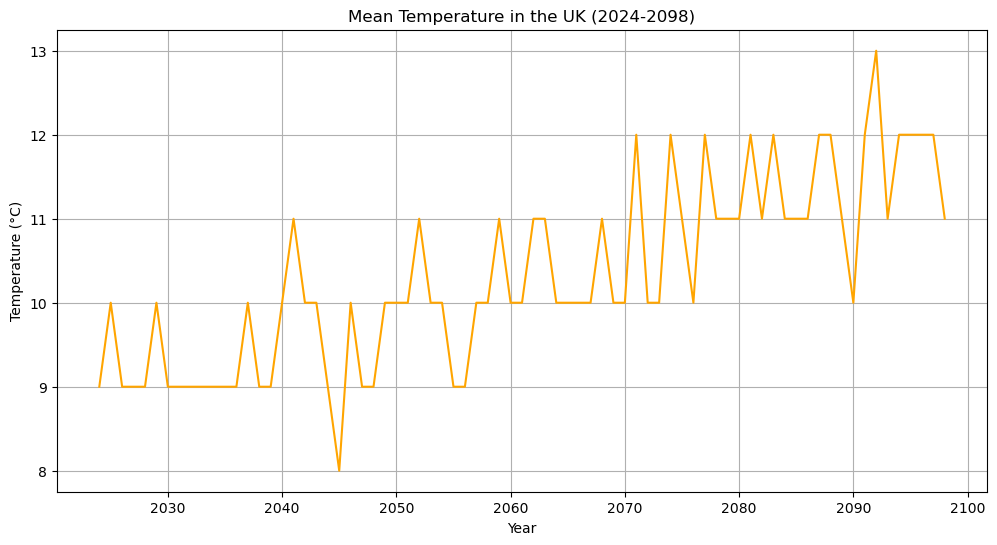

In [47]:
# Calculate the mean temperature for each month
temp_mean = temp_uk.groupby(temp_uk['Year'].dt.year)['Temperature'].mean().reset_index().astype('int16')

# Plot the mean temperature for each year
plt.figure(figsize=(12, 6))
sns.lineplot(data=temp_mean, x='Year', y='Temperature', color='orange')
plt.title('Mean Temperature in the UK (2024-2098)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

In [48]:
# Print minimum temperature
print("Minimum temperature in temp_mean: ")
print(temp_mean['Temperature'].min())

# Print maximum temperature
print("Maximum temperature in temp_mean: ")
print(temp_mean['Temperature'].max())

# Print the size of the array
print("Total number of elements in the array: ")
print(temp_mean.size)
print("Shape of the array: ")
print(temp_mean.shape)

Minimum temperature in temp_mean: 
8
Maximum temperature in temp_mean: 
13
Total number of elements in the array: 
150
Shape of the array: 
(75, 2)


# Sound Design 



In [49]:
# Mask the temperature array where the temperature is greater than or equal to 10
# This will return a boolean array, and keeps the array in the same shape
temperature_array = temp_mean['Temperature'].values >= 10

print(temperature_array[:10])
print("Total number of elements in the array: ")
print(temperature_array.size)
print("Shape of the array: ")
print(temperature_array.shape)


[False  True False False False  True False False False False]
Total number of elements in the array: 
75
Shape of the array: 
(75,)


# Implementation

In [50]:
# Sampling frequency
fs = 48000

# Duration of each tone in seconds
duration_per_sample = 3 

# Frequency range for dynamic base frequency
freq_start = 40  # Start frequency in Hz (A4)
freq_end = 120    # End frequency in Hz (A5)

# Exponential frequency range
base_frequency = np.linspace(freq_start, freq_end, num=len(temperature_array))

In [51]:
# Generate pitch-shifted and time-stretched signals based on temperature
left_signals = []
right_signals = []

# Basic sine wave template
t = np.linspace(0, duration_per_sample, int(fs * duration_per_sample), endpoint=False)
sine_wave = 0.5 * np.sin(2 * np.pi * base_frequency[0] * t)  # Initialize with any frequency

for i, temp in enumerate(temperature_array):
    if temp:
        # Select the base frequency for this temperature
        freq = base_frequency[i]

        # Basic sine wave
        sine_wave = 0.5 * np.sin(2 * np.pi * freq * t)

        # Normalize the sine wave
        sine_wave /= np.max(np.abs(sine_wave))

        # Apply Hamming window
        sine_wave *= np.hamming(len(sine_wave))

        # Apply amplitude modulation
        left_modulation = 1 + 0.4 * np.sin(2 * np.pi * 0.6 * t)  # 0.6 Hz modulation
        right_modulation = 1 + 0.6 * np.sin(2 * np.pi * 0.8 * t)  # 0.8 Hz modulation

        # Modulate sine wave differently for left and right channels
        left_signal = sine_wave * left_modulation
        right_signal = sine_wave * right_modulation

        # Apply reverb with different coefficients for left and right channels
        left_signal = apply_reverb(left_signal, [0.1], [1, -0.9])
        right_signal = apply_reverb(right_signal, [0.1], [1, -0.8])

        #Apply fade out to the end of each signal
        apply_fadeout(left_signal, fs, duration=0.5)
        apply_fadeout(right_signal, fs, duration=0.5)

        #Apply fade in to the beginning of each signal
        apply_fadein(left_signal, fs, duration=0.5)
        apply_fadein(right_signal, fs, duration=0.5)
    else:
        # Make the signal silent
        left_signal = np.zeros_like(sine_wave)
        right_signal = np.zeros_like(sine_wave)

    left_signals.append(left_signal)
    right_signals.append(right_signal)

# Concatenate all signals
left_channel = np.concatenate(left_signals)
right_channel = np.concatenate(right_signals)

# Combine left and right channels into a stereo signal
temp_signal = np.vstack((left_channel, right_channel)).T

# Normalize the final signal
temp_signal /= np.max(np.abs(temp_signal))

In [52]:
# Calculate the total time in minutes
total_time_minutes = len(temp_signal) / fs / 60
print(f"Total time: {total_time_minutes} minutes")

# Print the size and shape of the temperature array
print("Total number of elements in the array: ")
print(temperature_array.size)
print("Shape of the array: ")
print(temperature_array.shape)

Total time: 3.75 minutes
Total number of elements in the array: 
75
Shape of the array: 
(75,)


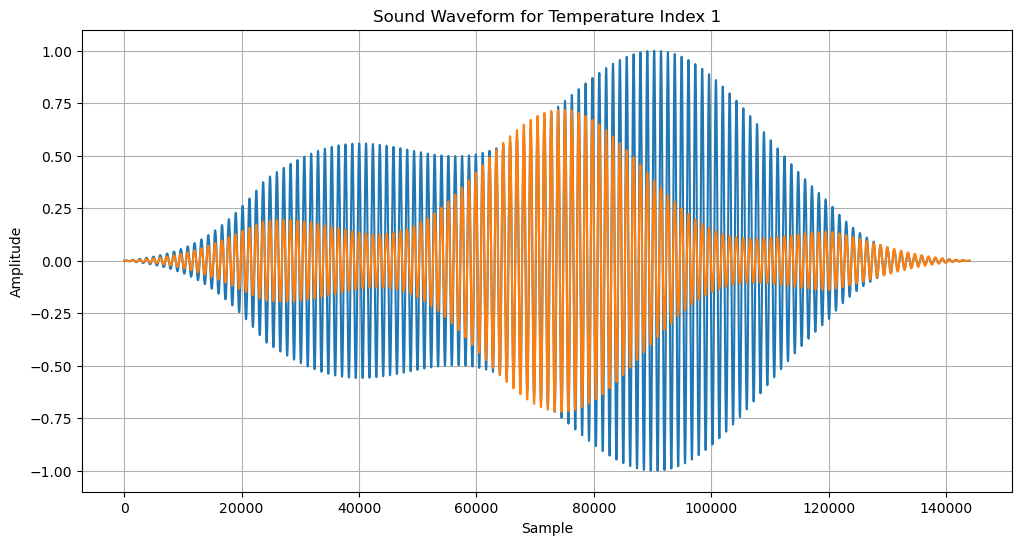

In [53]:
# Select the non-silent values from the temperature array
non_silent_indices = np.where(temperature_array)[0]

# Plot one value sound
index_to_plot = non_silent_indices[0]  # Select the first non-silent index
plt.figure(figsize=(12, 6))
plt.plot(temp_signal[index_to_plot * fs * duration_per_sample:(index_to_plot + 1) * fs * duration_per_sample])
plt.title(f'Sound Waveform for Temperature Index {index_to_plot}')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [54]:
# Play the final sound
sd.play(temp_signal, fs)
sd.stop()

# Rain

In [55]:
# Adjust the relative path to the correct location
notebook_dir = os.getcwd()
rain_path = os.path.join(notebook_dir, '..', 'data_files', 'rain.csv')

# Skip metadata rows and read the data
rain_df = pd.read_csv(
    rain_path, 
    skiprows=52,  # Skip rows up to the actual data header 
    sep=',',      # Specify the correct delimiter (comma in this case)
    engine='python',  # Use Python engine for flexible parsing
    on_bad_lines='skip'  # Skip any problematic rows
)

rain_df

,Date,AL,AT,BA,BE,BG,CH,CY,CZ,DE,...,NO,PL,PT,RO,RS,SE,SI,SK,TR,UK
0,1970-01-31,0.102987,0.040859,0.110951,0.019889,0.027872,0.056352,0.044604,0.016519,0.014737,...,0.126559,0.018551,0.135261,0.043586,0.047650,0.037625,0.128767,0.047397,0.049972,0.096121
1,1970-02-28,0.145762,0.079290,0.080542,0.060157,0.037311,0.128630,0.025560,0.052590,0.052911,...,0.088117,0.046426,0.052006,0.036887,0.042874,0.038868,0.075313,0.047363,0.056213,0.075361
2,1970-03-31,0.053327,0.095198,0.043193,0.057971,0.048398,0.108462,0.116621,0.053577,0.070334,...,0.125401,0.057576,0.020463,0.052975,0.053031,0.047420,0.007280,0.036553,0.125981,0.109952
3,1970-04-30,0.009653,0.030830,0.029149,0.065405,0.016689,0.053831,0.040317,0.015963,0.038655,...,0.088969,0.024292,0.056574,0.017864,0.013159,0.053568,0.053104,0.015857,0.046603,0.092313
4,1970-05-31,0.080940,0.063861,0.152486,0.072325,0.100689,0.071620,0.030480,0.036258,0.047643,...,0.089834,0.026943,0.078356,0.071609,0.088968,0.049397,0.082106,0.044542,0.101177,0.054328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,2098-08-31,0.007567,0.074466,0.032277,0.055305,0.014018,0.137998,0.000119,0.077057,0.080805,...,0.101582,0.129035,0.001457,0.052156,0.030378,0.094417,0.082028,0.086389,0.004303,0.062422
1544,2098-09-30,0.050473,0.145336,0.115261,0.107559,0.023085,0.164634,0.000506,0.128594,0.116887,...,0.092527,0.131022,0.005530,0.106278,0.077592,0.090615,0.134254,0.146108,0.014454,0.080680
1545,2098-10-31,0.081544,0.079480,0.126952,0.074692,0.064870,0.118129,0.002298,0.050972,0.073334,...,0.188140,0.051149,0.041296,0.013926,0.053751,0.066091,0.140876,0.049680,0.020731,0.085424
1546,2098-11-30,0.200147,0.092937,0.167389,0.034274,0.069995,0.083211,0.009353,0.051482,0.042226,...,0.068985,0.074140,0.160290,0.054953,0.078351,0.040318,0.202290,0.084894,0.056693,0.048578


In [56]:
# Ensure 'Date' is parsed as a datetime column
rain_df['Date'] = pd.to_datetime(rain_df['Date'])

# Extract the year and month from 'Date'
rain_df['Year'] = rain_df['Date'].dt.to_period('M')

# Convert 'Year' to datetime format for plotting
rain_df['Year'] = rain_df['Year'].dt.to_timestamp()

# Filter rows between 2024 and 2098
rain_pred = rain_df[rain_df['Year'] >= '2024-01']

# Select only 'year and month' and 'UK' columns
rain_uk = rain_pred[['Year', 'UK']].copy()

# Rename UK collumn to Rainfall(mm)
rain_uk.rename(columns={'UK':'Rainfall'}, inplace=True)

print(rain_uk)
print(rain_uk.size)

           Year  Rainfall
648  2024-01-01  0.112557
649  2024-02-01  0.111266
650  2024-03-01  0.084483
651  2024-04-01  0.071342
652  2024-05-01  0.073365
...         ...       ...
1543 2098-08-01  0.062422
1544 2098-09-01  0.080680
1545 2098-10-01  0.085424
1546 2098-11-01  0.048578
1547 2098-12-01  0.097036

[900 rows x 2 columns]
1800


In [57]:
# Multiply the 'Rainfall' column by 1000 to convert to mm
rain_uk['Rainfall'] *= 100

# Calculate the mean rainfall for each year
rain_mean = rain_uk.groupby(rain_uk['Year'].dt.year)['Rainfall'].mean().reset_index().astype('int16')

print(rain_mean)
print(rain_mean.shape)

    Year  Rainfall
0   2024         8
1   2025         9
2   2026         9
3   2027         7
4   2028         9
..   ...       ...
70  2094         9
71  2095         8
72  2096         8
73  2097         9
74  2098         8

[75 rows x 2 columns]
(75, 2)


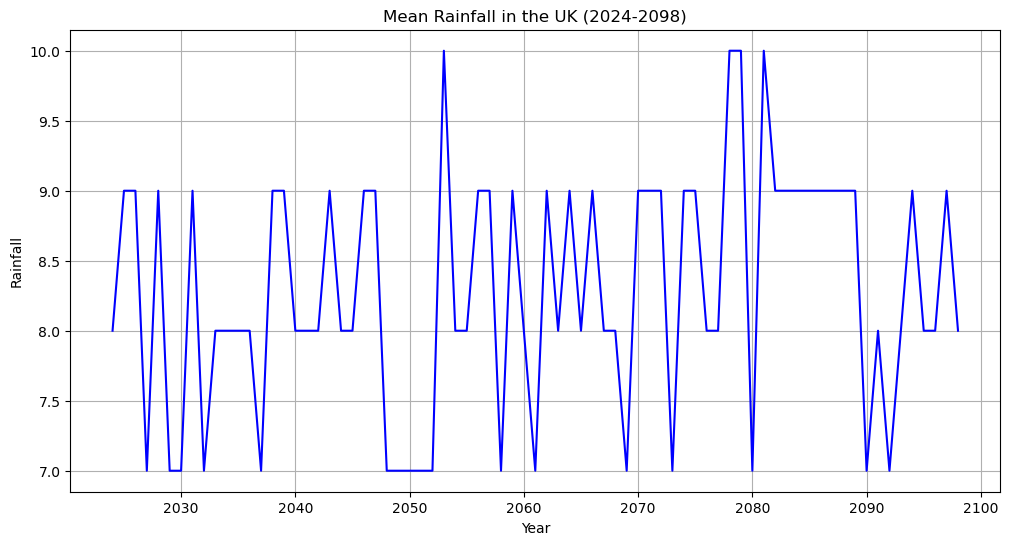

In [58]:
# Plot the mean rainfall for each year
plt.figure(figsize=(12, 6))
sns.lineplot(data=rain_mean, x='Year', y='Rainfall', color='blue')
plt.title('Mean Rainfall in the UK (2024-2098)')
plt.xlabel('Year')
plt.ylabel('Rainfall')
plt.grid(True)
plt.show()

In [59]:
# Calculate minimum and maximum rainfall
min_rain_mean = rain_mean['Rainfall'].min()
max_rain_mean = rain_mean['Rainfall'].max()

# Print minimum and maximum rainfall
print(f"Min Rainfall Mean: {min_rain_mean}")
print(f"Max Rainfall Mean: {max_rain_mean}")

# Print the size and shape of the array
print("Total number of elements in the array: ")
print(rain_mean.size)
print("Shape of the array: ")
print(rain_mean.shape)

Min Rainfall Mean: 7
Max Rainfall Mean: 10
Total number of elements in the array: 
150
Shape of the array: 
(75, 2)


# Sound Design 


In [64]:
# Ensure rain_array is correctly initialized
rain_array = rain_mean['Rainfall'].values

# Initialize lists to store the signals
left_signals = []
right_signals = []

for i, rain in enumerate(rain_array):
    # Generate white noise
    white_noise = np.random.normal(0, 1, fs * duration_per_sample)

    # Normalize the white noise safely
    white_noise /= (np.max(np.abs(white_noise)))

    if rain:
        # Use white noise as the signal for both channels
        left_signal = white_noise
        right_signal = white_noise
    else:
        # Make the signal silent
        left_signal = np.zeros_like(white_noise)
        right_signal = np.zeros_like(white_noise)

    left_signals.append(left_signal)
    right_signals.append(right_signal)

# Concatenate all signals
left_channel = np.concatenate(left_signals)
right_channel = np.concatenate(right_signals)

# Combine left and right channels into a stereo signal
rain_signal = np.vstack((left_channel, right_channel)).T

# Normalize the final signal safely
rain_signal /= (np.max(np.abs(rain_signal)))

# Calculate the total time in minutes
total_time_minutes = len(rain_signal) / fs / 60
print(f"Total time: {total_time_minutes} minutes")


Total time: 3.75 minutes


In [63]:
sd.play(rain_signal, fs)
sd.stop()